<a href="https://colab.research.google.com/github/Phillyprogramer215/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

In [0]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
plt.style.use('fast')
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

In [211]:
#pandas built in visulization tool
#read in the titanic dataset

url= 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [212]:
#cabin class is a categorical variable
#it can be displated using either a number or a string

df['cabin_class']=df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


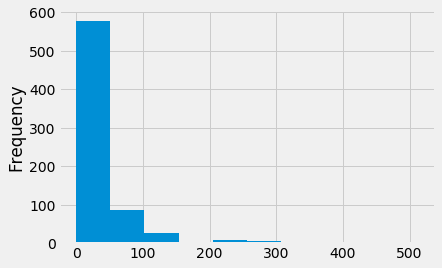

In [213]:
#fare is a continous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

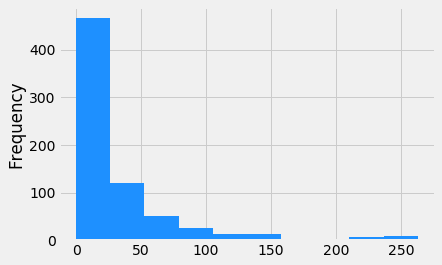

In [214]:
#remove the two extreme outliers

df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue')

In [215]:
#A continuos variable can be converted into a categorical variable using binning.
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults = df['fare_groups'].value_counts().sort_index()

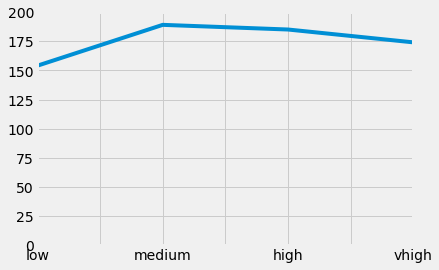

In [217]:
#sometimes it is important to specify the range of your y-axis to get more accurate results.
#'lim'='limits'
myresults.plot(ylim=(0,200));

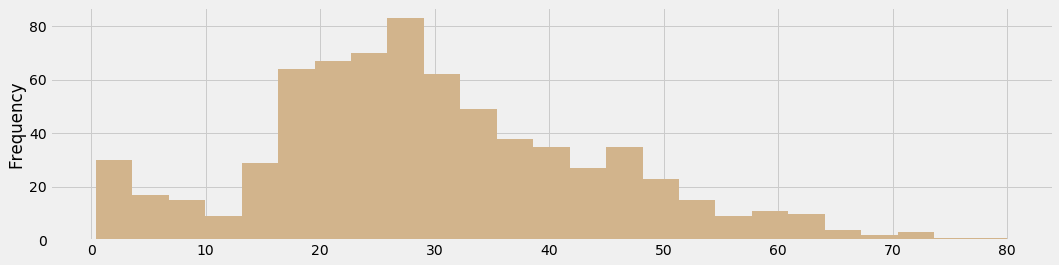

In [218]:
#histogram

df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan')

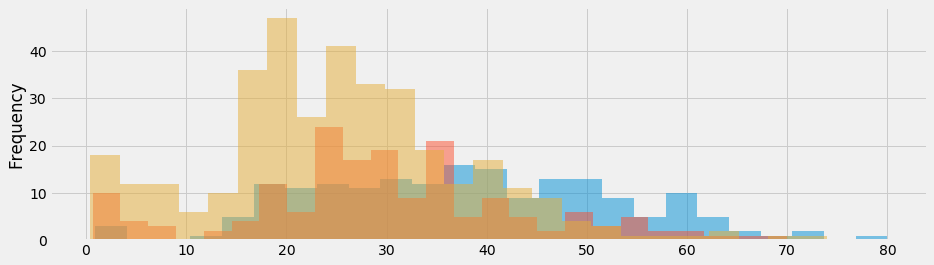

In [219]:
#stacked histogram of continuous variable broken out by categorical variables
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);

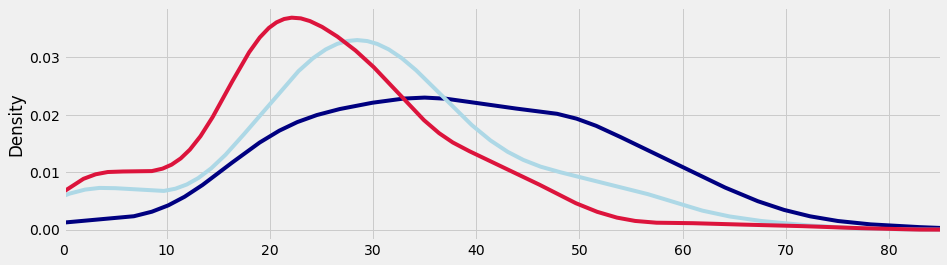

In [220]:
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='navy');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='lightblue');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='crimson');

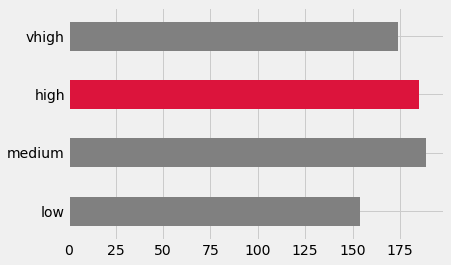

In [221]:
#bar chart using colors to make a particular value pop
df['fare_groups'].value_counts().sort_index().plot(kind='barh', color=['gray', 'gray', 'crimson', 'gray']);

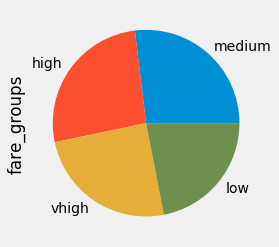

In [222]:
#pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [0]:
#compare two categorical variables using crosstab
cab_survive = pd.crosstab(df['cabin_class'], df['Survived'])

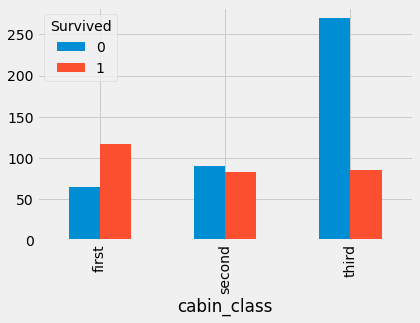

In [224]:
cab_survive.plot(kind='bar');

In [0]:
#crosstab with column percents
cab_survive1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')

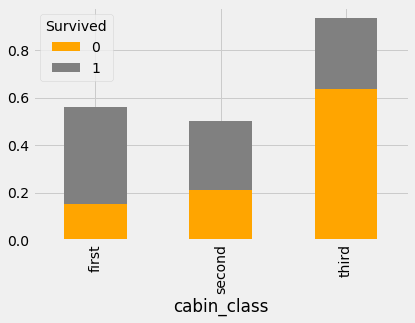

In [226]:
#make a stacked bar chart, for easy comparison of two categorical variables. 
cab_survive1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
#corsstab with column percents. 
cab_survive2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')

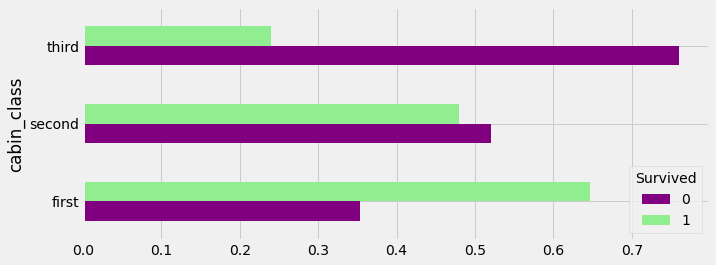

In [228]:
# a paired barchart for comparison of two categorical variables. Note the use of 'barh'
cab_survive2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

In [229]:
#lets look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [0]:
#not explore the continuous variable broken out by categorical (i.e., categorical) variable.
cab_age = df.groupby('cabin_class')['Age'].mean()

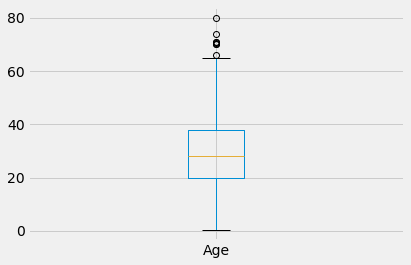

In [231]:
df['Age'].plot(kind='box');

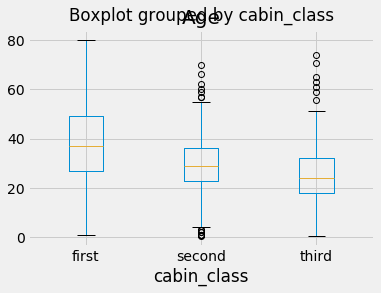

In [232]:
#but to break out a continuous variable by a categorical variable, use .boxplot
df.boxplot(column='Age', by='cabin_class');

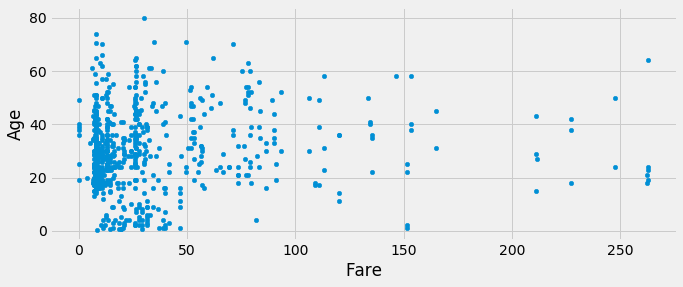

In [233]:
#comparing two or three continous variables
#two continous variables:age by fare
df.plot(kind='scatter', x='Fare', y='Age', figsize=(10,4));

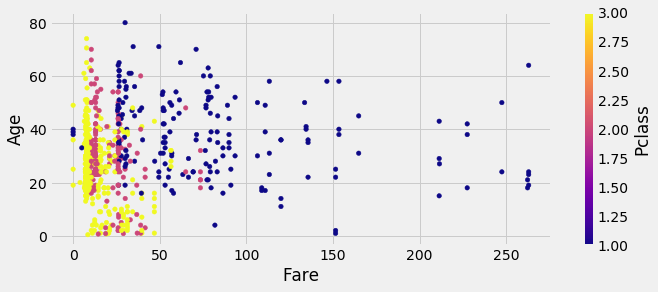

In [234]:
#three variables: age,fare and cabin class (color can be either continous or categorical here).
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(10,4));

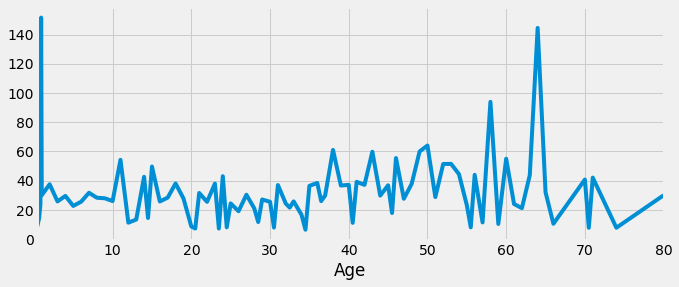

In [235]:
#line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(kind='line', figsize = (10,4));

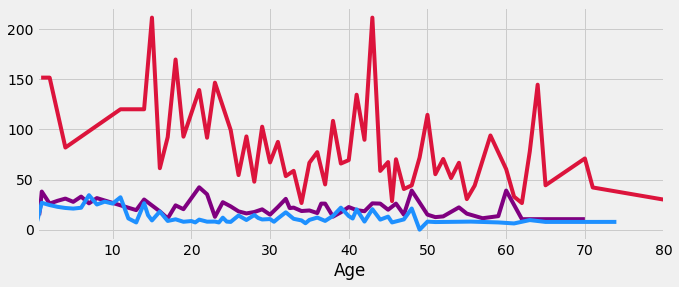

In [236]:
#line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
#rather than specifying 3 plots (as we did above with the histogram)
#you can just loop throught the values. 
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(10,4), color = mycolors[x-1])

In [237]:
#correlation matrix
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


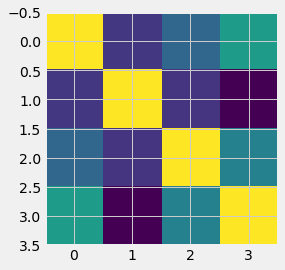

In [238]:
plt.imshow(corr_matrix);

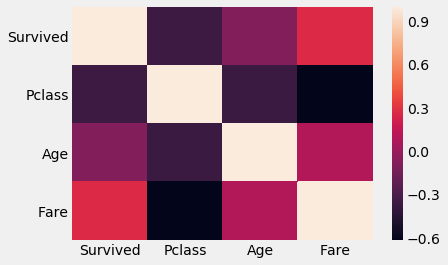

In [239]:
#seaborn.
import seaborn as sns
sns.heatmap(corr_matrix);

In [0]:
#intro into matplotlib
import numpy as np
x = np.linspace(0, 5, 11)
y = x**2

In [241]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [242]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

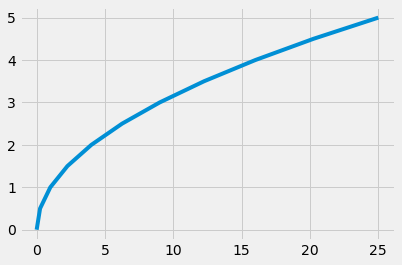

In [243]:
#a very simple plot, to get started that no pandas is required
plt.plot(y,x);

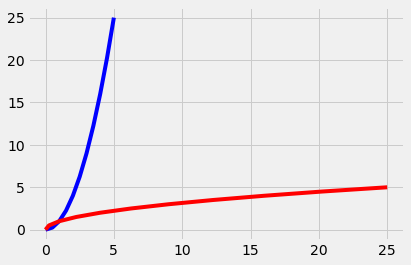

In [244]:
plt.plot(x, y,'b')
plt.plot(y, x,'r');

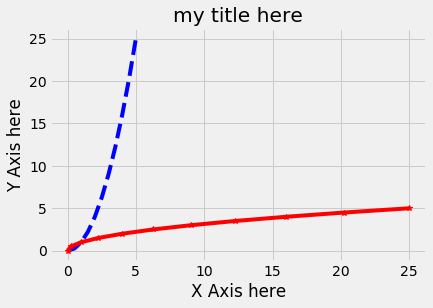

In [245]:
#now add some labels, plus a little texture
plt.plot(x, y,'b--')
plt.plot(y, x,'r*-')
plt.xlabel('X Axis here')
plt.ylabel('Y Axis here')
plt.title('my title here');

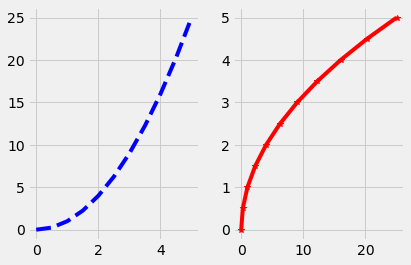

In [246]:
plt.subplot(1,2,1)
plt.plot(x,y, 'b--')

plt.subplot(1,2,2)
plt.plot(y,x, 'r*-');

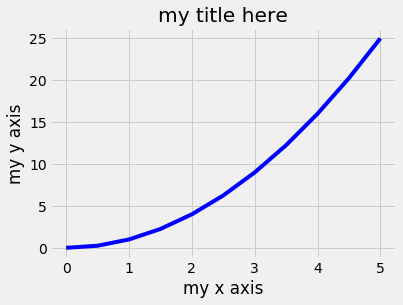

In [247]:
#create figure (empty canvas)
fig = plt.figure()
#add a set of axes to figure 
#left, bottom, width, height (range 0-1)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my title here');
#notice the use of set_ to begin methods

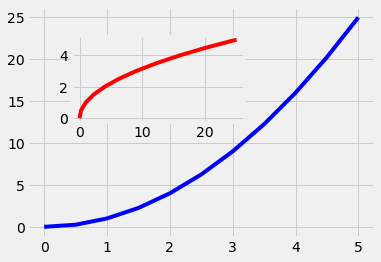

In [248]:
#create blank canvas
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]);
#larger figure axes 1
axes1.plot(x,y,'b')
#isertfigure axes 2
axes2.plot(y,x,'r')

In [0]:
#fig, ax =plt.subplots()

In [0]:
#fig = plt.figure()
#ax= fig.add_subplot(111)

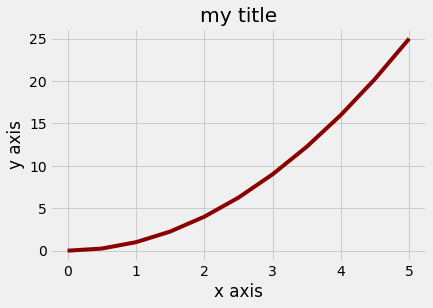

In [251]:
#use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1)

#the default is (1,1) so you don't actually have to specify this
#now use the axes object to add stuff to the plot
axes.plot(x,y,'darkred')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('my title');

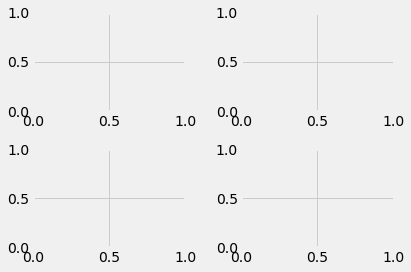

In [252]:
#empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

#the parameter labels nrows and ncols are optional.
plt.tight_layout()
#more about .tight_layout() below

In [253]:
#axes in an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2a5276b00>,
      dtype=object)

In [0]:
#we can iterate thorught this array

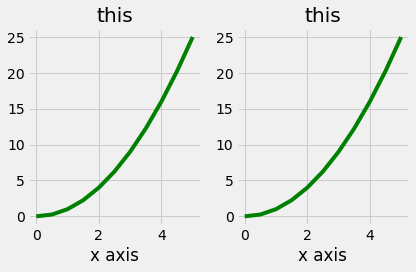

In [255]:
fig, axes = plt.subplots(nrows=1, ncols=2)

#display the figure object
for ax in axes:
  ax.plot(x,y, 'g')
  ax.set_xlabel('x axis')
  ax.set_title('this')
plt.tight_layout()

In [0]:
#figure size, aspedct ratio and DPI
#Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the figsize and dpi keyword arguments.

#figsize is a tuple of the width and height of the figure in inches
#dpi is the dots-per-inch (pixel per inch).
#For example:

In [257]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

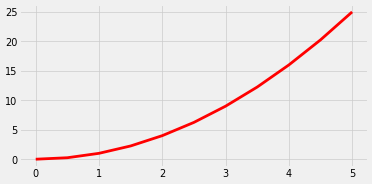

In [258]:
fig, axes= plt.subplots(figsize=(8,4), dpi=50)
axes.plot(x,y,'r');

In [0]:
#saving figures
fig.savefig('filename.png')

In [260]:
#lengends, labels and titles 
#figure titles
ax.set_title('my title')

Text(0.5, 1, 'my title')

In [0]:
#You can use the label="label text" keyword argument when plots or
#other objects are added to the figure, and then using the legend method 
#without arguments to add the legend to the figure:

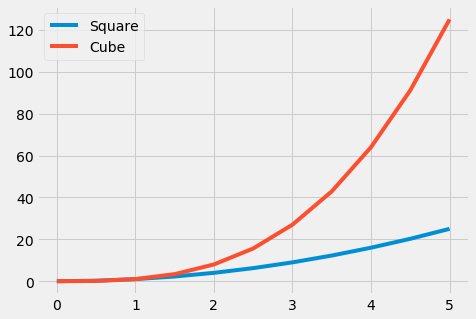

In [262]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label='Square')
ax.plot(x, x**3, label='Cube')
ax.legend();

In [0]:
#The legend function takes an optional keyword argument loc that can be used
#to specify where in the figure the legend is to be drawn. The allowed values
#of loc are numerical codes for the various places the legend can be drawn. 
#See the documentation page for details. Some of the most common loc values are:

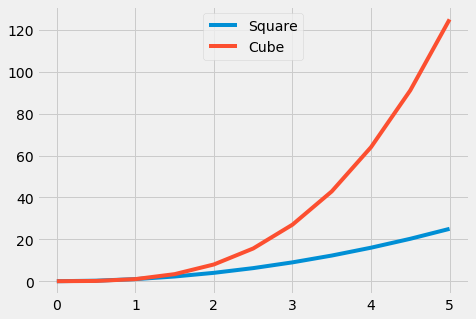

In [264]:
# lots of options
ax.legend(loc=1)
ax.legend(loc=5)
ax.legend(loc=9)
fig

#try replacing the loc value with intgers 1 thorugh 10
#let matplotlib decide the optimal location

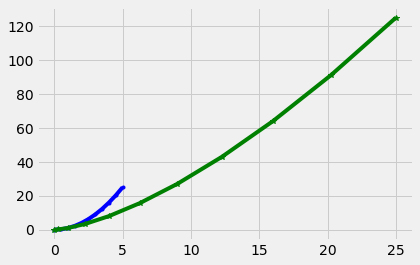

In [265]:
#matlab style line color and style
fig, ax = plt.subplots()
#blue line with dots
ax.plot(x, x**2, 'b.-')
#green dashed line
ax.plot(y,x**3, 'g-*');

In [0]:
#colors with the color= parameter

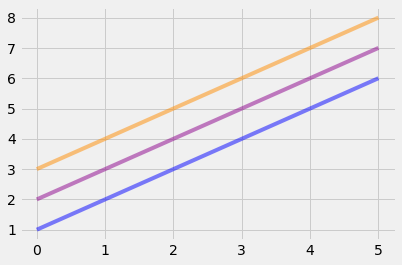

In [267]:
fig, ax = plt.subplots()
#half-transparant
ax.plot(x, x+1, color='blue', alpha=0.5)
# rgb hex code
ax.plot(x, x+2, color = '#8b008b', alpha=0.5)
#rgb hex code
ax.plot(x, x+3, color= '#FF8C00', alpha=0.5)

In [0]:
#Line marker styles

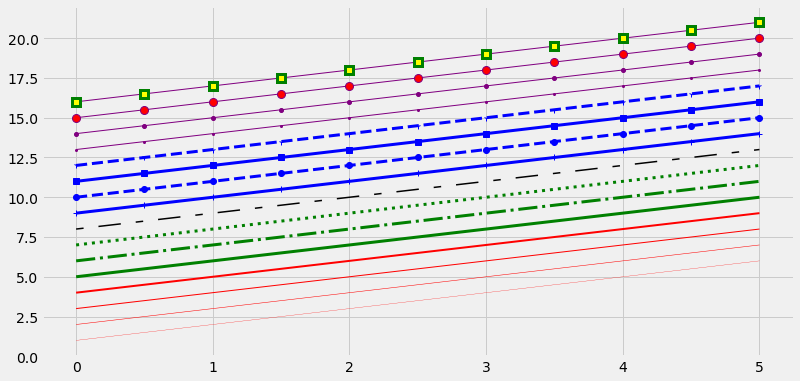

In [269]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(x, x+1, color='red', linewidth=0.25)
ax.plot(x, x+2, color='red', linewidth=0.50)
ax.plot(x, x+3, color='red', linewidth=1.00)
ax.plot(x, x+4, color='red', linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

In [0]:
#plot range

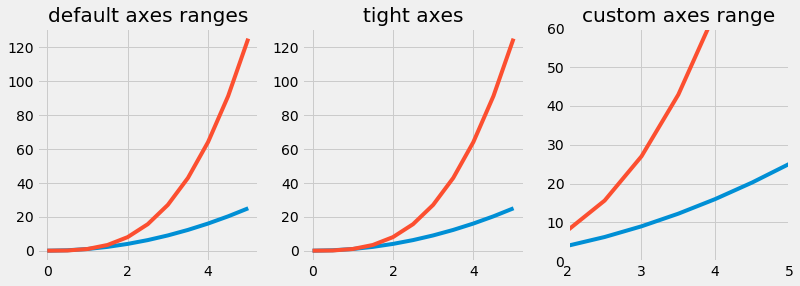

In [271]:
fig, axes = plt.subplots(1,3, figsize=(12,4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('default axes ranges')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0,60])
axes[2].set_xlim([2,5])
axes[2].set_title('custom axes range');

In [0]:
##Imitate a real-world example

In [273]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# make fake prototypes
#what styles are available in matplotlib? there's one for 538
plt.style.available
plt.style.use('fivethirtyeight')

In [0]:
# create fake data to replicate the blog post figure
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

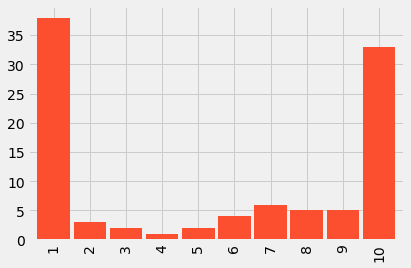

In [276]:
fake = pd.Series(fakelist, index=range(1,11))
fake.plot.bar(color='C1', width=0.9);

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [0]:
fake2 = pd.Series(fakelist2)

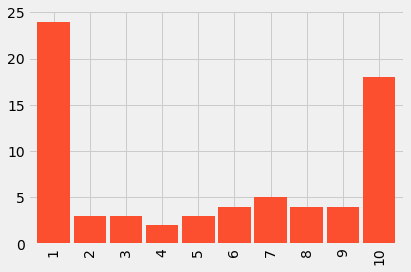

In [279]:
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [0]:
#annotate with text

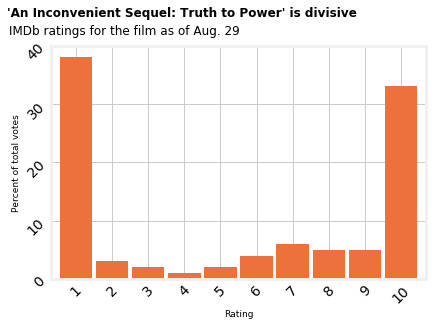

In [281]:
fig, ax= plt.subplots()
fig.patch.set(facecolor='white')

#set the bars
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')

#set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42);

#set the x and y axes labels
ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

#fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=45)
ax.set_yticklabels(range(0,50,10), rotation=45)
ax.set_yticks(range(0,50,10));

In [282]:
display(example)

In [0]:
#reproduce with real data
#read the data from 538's github repo
df= pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [284]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
#convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
#use the timestamp as the unique index identifier
#so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [287]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
#grab only the rows corresponding to the last day
lastday=df['2017-08-29']

In [0]:
#get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category']=='IMDb users']

In [290]:
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [291]:
#just grab the last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [292]:
# grab only the percentage columns since we don't care about the raw
#counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
             '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [293]:
#rese the index so that its numeric again
#and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [294]:
display(example)

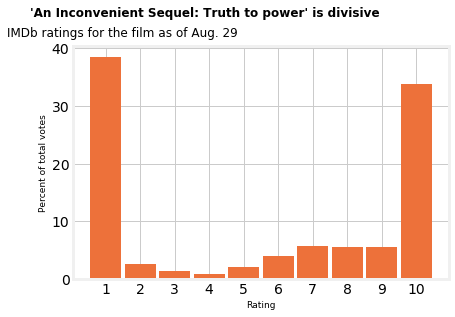

In [295]:
fig, ax = plt.subplots()

#figure background color
fig.patch.set(facecolor='white')

#set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color='#ED713A')

#axes background color
ax.set(facecolor='white')

#set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth to power' is divisive", 
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42)

#set the x and y axes labels
ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

#fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
# real data example #2

In [297]:
url = 'https://raw.githubusercontent.com/Phillyprogramer215/data/master/bad-drivers/bad-drivers.csv'
df1 = pd.read_csv(url)
df1.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [298]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2014/10/chalabi-datalab-insurance2.png?w=1150'
example = Image(url=url, width=550)

display(example)

In [299]:
df1.set_index('State', inplace=True)
df1.head()

,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
State,,,,,,,
Alabama,18.8,39,30,96,80,784.55,145.08
Alaska,18.1,41,25,90,94,1053.48,133.93
Arizona,18.6,35,28,84,96,899.47,110.35
Arkansas,22.4,18,26,94,95,827.34,142.39
California,12.0,35,28,91,89,878.41,165.63


In [300]:
clean_data = pd.read_csv('Average_Insurance_data.csv')
clean_data.head()

,States,Car Insurance Premiums
0,Alabama,784.55
1,Alaska,1053.48
2,Arizona,899.47
3,Arkansas,827.34
4,California,878.41


In [301]:
clean_data.set_index('States', inplace=True)
clean_data.head()

,Car Insurance Premiums
States,
Alabama,784.55
Alaska,1053.48
Arizona,899.47
Arkansas,827.34
California,878.41


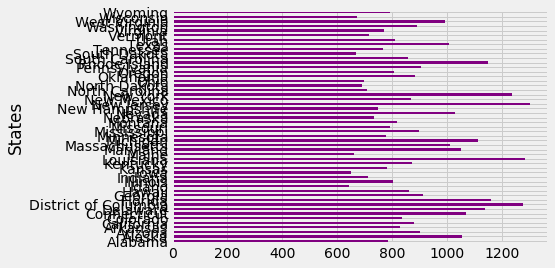

In [302]:
clean_data['Car Insurance Premiums'].sort_index().plot(kind='barh', color='purple');

In [0]:
import matplotlib.pyplot as plt

In [303]:
display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here